
This practice aims to compare Polars and Pandas, Matplotlib and Plotly, representing an ultimate exercise in exploring diverse tools for data manipulation and visualization. <b>While Pandas and Matplotlib are staples in data analysis, Plotly and Polars emerge as new and powerful alternatives</b>, each offering unique capabilities suited to modern data science challenges. Therefore, this practice would be focus on EDA instead of ML methods.

#### Import Libraries

In [2]:
import polars as pl
import pandas as pd

#### Load data 

In [3]:
df = pl.read_csv('./dataset/Time-Wasters on Social Media.csv')
data = pd.read_csv('./dataset/Time-Wasters on Social Media.csv')

In [4]:
df.head()

UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,Total Time Spent,Number of Sessions,Video ID,Video Category,Video Length,Engagement,Importance Score,Time Spent On Video,Number of Videos Watched,Scroll Rate,Frequency,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
i64,i64,str,str,i64,bool,bool,str,str,str,i64,i64,i64,str,i64,i64,i64,i64,i64,i64,str,i64,i64,str,str,str,str,i64,i64,str,str
1,56,"""Male""","""Pakistan""",82812,true,true,"""Engineer""","""Rural""","""Instagram""",80,17,4229,"""Pranks""",24,7867,5,26,22,87,"""Night""",3,7,"""Procrastination""","""Smartphone""","""Android""","""9:00 PM""",5,5,"""Commuting""","""Mobile Data"""
2,46,"""Female""","""Mexico""",27999,false,true,"""Artist""","""Urban""","""Instagram""",228,14,2131,"""Pranks""",19,5944,6,25,31,46,"""Afternoon""",5,5,"""Habit""","""Computer""","""Android""","""5:00 PM""",7,3,"""At school""","""Wi-Fi"""
3,32,"""Female""","""United States""",42436,false,true,"""Engineer""","""Rural""","""Facebook""",30,6,4367,"""Vlogs""",19,8674,3,9,7,88,"""Evening""",6,4,"""Entertainment""","""Tablet""","""Android""","""2:00 PM""",8,2,"""At home""","""Mobile Data"""
4,60,"""Male""","""Barzil""",62963,true,false,"""Waiting staff""","""Rural""","""YouTube""",101,19,1507,"""Vlogs""",4,2477,2,6,41,93,"""Night""",3,7,"""Habit""","""Smartphone""","""Android""","""9:00 PM""",5,5,"""Commuting""","""Mobile Data"""
5,25,"""Male""","""Pakistan""",22096,false,true,"""Manager""","""Urban""","""TikTok""",136,6,2159,"""Gaming""",19,3093,7,13,21,4,"""Morning""",8,2,"""Boredom""","""Smartphone""","""iOS""","""8:00 AM""",10,0,"""At home""","""Mobile Data"""


In [5]:
data.head()

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data


When comparing Polars and Pandas, notable distinctions emerge: Polars displays  dtypes within the table itself while omitting row indices. In contrast, Pandas typically reveals a summary row count and column dimensions (e.g., "5 rows × 31 columns") at the footer of the output.

#### Data Preprocess

In [6]:
df.drop_nulls()
df.select(pl.all().is_null().sum())

UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,Total Time Spent,Number of Sessions,Video ID,Video Category,Video Length,Engagement,Importance Score,Time Spent On Video,Number of Videos Watched,Scroll Rate,Frequency,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
data.dropna()
data.isnull().sum().to_frame().T

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df.describe()

statistic,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,Total Time Spent,Number of Sessions,Video ID,Video Category,Video Length,Engagement,Importance Score,Time Spent On Video,Number of Videos Watched,Scroll Rate,Frequency,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
str,f64,f64,str,str,f64,f64,f64,str,str,str,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,str,f64,f64,str,str,str,str,f64,f64,str,str
"""count""",1000.0,1000.0,"""1000""","""1000""",1000.0,1000.0,1000.0,"""1000""","""1000""","""1000""",1000.0,1000.0,1000.0,"""1000""",1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,"""1000""",1000.0,1000.0,"""1000""","""1000""","""1000""","""1000""",1000.0,1000.0,"""1000""","""1000"""
"""null_count""",0.0,0.0,"""0""","""0""",0.0,0.0,0.0,"""0""","""0""","""0""",0.0,0.0,0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,"""0""",0.0,0.0,"""0""","""0""","""0""","""0""",0.0,0.0,"""0""","""0"""
"""mean""",500.5,40.986,null,null,59524.213,0.599,0.542,null,null,null,151.406,10.013,4891.738,null,15.214,4997.159,5.129,14.973,25.248,49.774,null,5.136,4.864,null,null,null,null,7.094,2.906,null,null
"""std""",288.819436,13.497852,null,null,23736.212925,null,null,null,null,null,83.952637,5.380314,2853.144258,null,8.224953,2910.053701,2.582834,8.200092,14.029159,29.197798,null,2.122265,2.122265,null,null,null,null,2.058495,2.058495,null,null
"""min""",1.0,18.0,"""Female""","""Barzil""",20138.0,0.0,0.0,"""Artist""","""Rural""","""Facebook""",10.0,1.0,11.0,"""ASMR""",1.0,15.0,1.0,1.0,1.0,1.0,"""Afternoon""",1.0,1.0,"""Boredom""","""Computer""","""Android""","""10:15 PM""",3.0,0.0,"""At home""","""Mobile Data"""
"""25%""",251.0,29.0,null,null,38681.0,null,null,null,null,null,78.0,6.0,2545.0,null,8.0,2416.0,3.0,8.0,14.0,23.0,null,3.0,4.0,null,null,null,null,5.0,2.0,null,null
"""50%""",501.0,42.0,null,null,58975.0,null,null,null,null,null,152.0,10.0,4723.0,null,15.0,5024.0,5.0,15.0,25.0,50.0,null,5.0,5.0,null,null,null,null,7.0,3.0,null,null
"""75%""",750.0,52.0,null,null,79766.0,null,null,null,null,null,223.0,15.0,7346.0,null,22.0,7540.0,7.0,22.0,37.0,74.0,null,6.0,7.0,null,null,null,null,8.0,5.0,null,null
"""max""",1000.0,64.0,"""Other""","""Vietnam""",99676.0,1.0,1.0,"""driver""","""Urban""","""YouTube""",298.0,19.0,9997.0,"""Vlogs""",29.0,9982.0,9.0,29.0,49.0,99.0,"""Night""",9.0,9.0,"""Procrastination""","""Tablet""","""iOS""","""9:55 AM""",10.0,7.0,"""Commuting""","""Wi-Fi"""


In [9]:
data.describe()

,UserID,Age,Income,Total Time Spent,Number of Sessions,Video ID,Video Length,Engagement,Importance Score,Time Spent On Video,Number of Videos Watched,Scroll Rate,ProductivityLoss,Satisfaction,Self Control,Addiction Level
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.986000,59524.213000,151.406000,10.013000,4891.738000,15.214000,4997.159000,5.129000,14.973000,25.248000,49.774000,5.136000,4.864000,7.094000,2.906000
std,288.819436,13.497852,23736.212925,83.952637,5.380314,2853.144258,8.224953,2910.053701,2.582834,8.200092,14.029159,29.197798,2.122265,2.122265,2.058495,2.058495
min,1.000000,18.000000,20138.000000,10.000000,1.000000,11.000000,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000
25%,250.750000,29.000000,38675.250000,78.000000,6.000000,2542.000000,8.000000,2415.750000,3.000000,8.000000,14.000000,23.000000,3.000000,4.000000,5.000000,2.000000
50%,500.500000,42.000000,58805.000000,152.000000,10.000000,4720.500000,15.000000,5016.000000,5.000000,15.000000,25.000000,50.000000,5.000000,5.000000,7.000000,3.000000
75%,750.250000,52.000000,79792.250000,223.000000,15.000000,7346.000000,22.000000,7540.250000,7.000000,22.000000,37.000000,74.000000,6.000000,7.000000,8.000000,5.000000
max,1000.000000,64.000000,99676.000000,298.000000,19.000000,9997.000000,29.000000,9982.000000,9.000000,29.000000,49.000000,99.000000,9.000000,9.000000,10.000000,7.000000


After cleaning the data, all entries remain intact, indicating the absence of empty data in our dataset. In Polars, it's notable that even for columns containing strings, data is shown in the describe function output.

### First Round EDA for univariate analysis

All visualizations will utilize the Polars DataFrame for the following analysis.

#### Import Libraries for analysis

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

#### Age Distribution

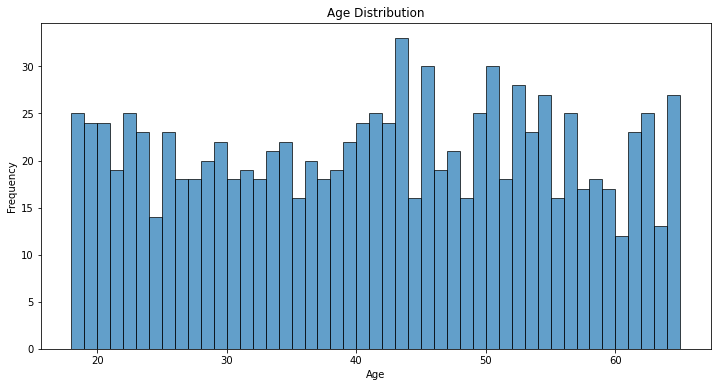

In [11]:
plt.figure(figsize=(12, 6))
plt.hist(df['Age'], bins=range(min(df['Age']), max(df['Age']) + 2, 1), edgecolor='black', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [12]:
trace = go.Histogram(
    x=df['Age'],
    xbins=dict(
        start=min(df['Age']),
        end=max(df['Age']+1),
        size=1
    ),
    nbinsx=40,
    marker=dict(color='rgba(100, 149, 237, 0.6)', line=dict(color='rgba(0, 0, 0, 0.5)', width=1))
)

layout = go.Layout(
    title='Age Distribution',
    xaxis=dict(title='Age'),
    yaxis=dict(title='Frequency')
)

fig = go.Figure(data=[trace], layout=layout)

fig.show()


Even in univariate analysis, it is evident that <b> Plotly surpasses Matplotlib in terms of data readability. </b>With Plotly, simply hovering the mouse reveals precise numerical values without requiring any aggregation.

#### Income Distribution

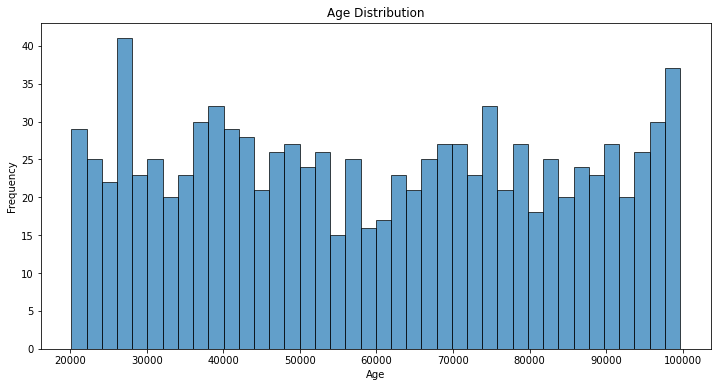

In [13]:
plt.figure(figsize=(12, 6))
plt.hist(df['Income'], bins=40, edgecolor='black', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [14]:
trace = go.Histogram(
    x=df['Income'],
    nbinsx=40,
    marker=dict(color='rgba(100, 149, 237, 0.6)', line=dict(color='rgba(0, 0, 0, 0.5)', width=1))
)

layout = go.Layout(
    title='Income Distribution',
    xaxis=dict(title='Income'),
    yaxis=dict(title='Frequency')
)

fig = go.Figure(data=[trace], layout=layout)

fig.show()

For this dataset, the distribution of income levels is fairly balanced.

#### Gender Distribution

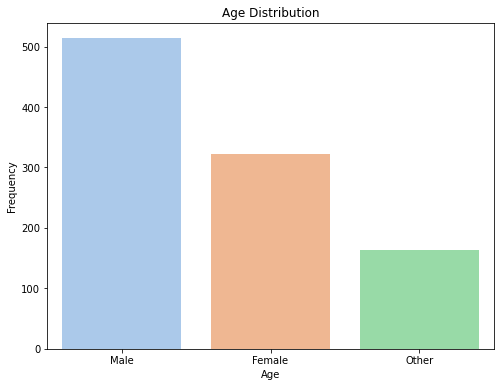

In [15]:
Gender = df['Gender'].to_pandas()

plt.figure(figsize=(8, 6))
sns.countplot(x=Gender, palette="pastel")
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Currently, Seaborn primarily relies on pandas or similar data structures for data visualization. Polars, on the other hand, is a fast data manipulation library designed for big data, with data structures that differ somewhat from pandas. As a result, Seaborn does not directly support Polars data structures as input.

In [16]:
Gender_counts = df['Gender'].value_counts()
Gender_counts = Gender_counts.sort('count', descending=True)

pastel_colors = ['#FFB7C5', '#AEC6CF', '#FFDAC1', '#B39EB5', '#FF6961', '#77DD77', '#FDFD96', '#CFCFC4', '#836953', '#F49AC2']
trace = go.Bar(
    x=Gender_counts['Gender'],
    y=Gender_counts['count'],
    marker=dict(
        color=pastel_colors[:len(Gender_counts)] 
    )
)

layout = go.Layout(
    title='Location Distribution',
    xaxis=dict(title='Gender'),
    yaxis=dict(title='Frequency')
)

fig = go.Figure(data=[trace], layout=layout)

fig.show()

Excluding the other category, this dataset shows a higher proportion of males than females.

#### Distribution of Location

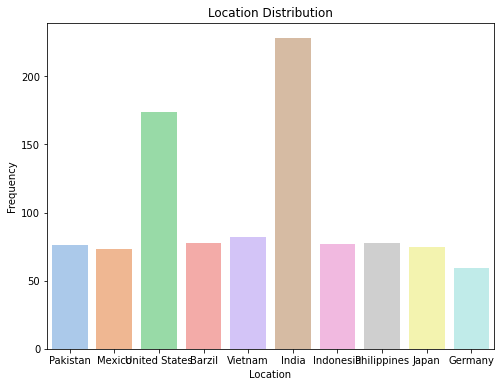

In [17]:
Location = df['Location'].to_pandas()

plt.figure(figsize=(8, 6))
sns.countplot(x=Location, palette="pastel")
plt.title('Location Distribution')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.show()

In [18]:
Location_counts = df['Location'].value_counts()
Location_counts = Location_counts.sort('count', descending=True)

pastel_colors = ['#FFB7C5', '#AEC6CF', '#FFDAC1', '#B39EB5', '#FF6961', '#77DD77', '#FDFD96', '#CFCFC4', '#836953', '#F49AC2']
trace = go.Bar(
    x=Location_counts['Location'],
    y=Location_counts['count'],
    marker=dict(
        color=pastel_colors[:len(Location_counts)] 
    )
)

layout = go.Layout(
    title='Location Distribution',
    xaxis=dict(title='Location'),
    yaxis=dict(title='Frequency')
)

fig = go.Figure(data=[trace], layout=layout)

fig.show()

This dataset primarily focuses on individuals from India, the US, and several other countries. Therefore, the insights derived from this data are particularly relevant to populations in these regions.

#### Distribution of Platforms

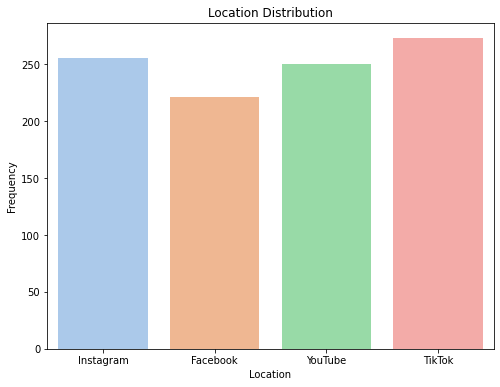

In [19]:
Platform = df['Platform'].to_pandas()

plt.figure(figsize=(8, 6))
sns.countplot(x=Platform, palette="pastel")
plt.title('Location Distribution')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.show()

In [20]:
Platform_counts = df['Platform'].value_counts()
Platform_counts = Platform_counts.sort('count', descending=True)

pastel_colors = ['#FFB7C5', '#AEC6CF', '#FFDAC1', '#B39EB5', '#FF6961', '#77DD77', '#FDFD96', '#CFCFC4', '#836953', '#F49AC2']
trace = go.Bar(
    x=Platform_counts['Platform'],
    y=Platform_counts['count'],
    marker=dict(
        color=pastel_colors[:len(Platform_counts)] 
    )
)

layout = go.Layout(
    title='Location Distribution',
    xaxis=dict(title='Location'),
    yaxis=dict(title='Frequency')
)

fig = go.Figure(data=[trace], layout=layout)

fig.show()

The dataset collects data from four different platforms: TikTok, Instagram, YouTube, and Facebook. The distribution of data among these platforms is fairly balanced.

I will leverage Plotly exclusively to explore additional variables such as Profession, Frequency, Productivity Loss, Current Activity, and OS.

In [21]:
Profession_counts = df['Profession'].value_counts()
Profession_counts = Profession_counts.sort('count', descending=True)

pastel_colors = ['#FFB7C5', '#AEC6CF', '#FFDAC1', '#B39EB5', '#FF6961', '#77DD77', '#FDFD96', '#CFCFC4', '#836953', '#F49AC2']
trace = go.Bar(
    x=Profession_counts['Profession'],
    y=Profession_counts['count'],
    marker=dict(
        color=pastel_colors[:len(Profession_counts)] 
    )
)

layout = go.Layout(
    title='Profession Distribution',
    xaxis=dict(title='Profession'),
    yaxis=dict(title='Frequency')
)

fig = go.Figure(data=[trace], layout=layout)

fig.show()

In [22]:
Frequency_counts = df['Frequency'].value_counts()
Frequency_counts = Frequency_counts.sort('count', descending=True)

pastel_colors = ['#FFB7C5', '#AEC6CF', '#FFDAC1', '#B39EB5', '#FF6961', '#77DD77', '#FDFD96', '#CFCFC4', '#836953', '#F49AC2']
trace = go.Bar(
    x=Frequency_counts['Frequency'],
    y=Frequency_counts['count'],
    marker=dict(
        color=pastel_colors[:len(Frequency_counts)] 
    )
)

layout = go.Layout(
    title='Profession Distribution',
    xaxis=dict(title='Time'),
    yaxis=dict(title='Frequency')
)

fig = go.Figure(data=[trace], layout=layout)

fig.show()

In [23]:
Productivity_counts = df['ProductivityLoss'].value_counts()
Productivity_counts = Productivity_counts.sort('count', descending=True)

pastel_colors = ['#FFB7C5', '#AEC6CF', '#FFDAC1', '#B39EB5', '#FF6961', '#77DD77', '#FDFD96', '#CFCFC4', '#836953', '#F49AC2']
trace = go.Bar(
    x=Productivity_counts['ProductivityLoss'],
    y=Productivity_counts['count'],
    marker=dict(
        color=pastel_colors[:len(Productivity_counts)] 
    )
)

layout = go.Layout(
    title='Productivity Loss Distribution',
    xaxis=dict(title='Productivity'),
    yaxis=dict(title='Frequency')
)

fig = go.Figure(data=[trace], layout=layout)

fig.show()

In [24]:
CurrentActivity_counts = df['CurrentActivity'].value_counts()
CurrentActivityn_counts = CurrentActivity_counts.sort('count', descending=True)

pastel_colors = ['#FFB7C5', '#AEC6CF', '#FFDAC1', '#B39EB5', '#FF6961', '#77DD77', '#FDFD96', '#CFCFC4', '#836953', '#F49AC2']
trace = go.Bar(
    x=CurrentActivity_counts['CurrentActivity'],
    y=CurrentActivity_counts['count'],
    marker=dict(
        color=pastel_colors[:len(CurrentActivity_counts)] 
    )
)

layout = go.Layout(
    title='CurrentActivity Distribution',
    xaxis=dict(title='CurrentActivity'),
    yaxis=dict(title='Frequency')
)

fig = go.Figure(data=[trace], layout=layout)

fig.show()

In [25]:
OS_counts = df['OS'].value_counts()
OS_counts = OS_counts.sort('count', descending=True)

pastel_colors = ['#FFB7C5', '#AEC6CF', '#FFDAC1', '#B39EB5', '#FF6961', '#77DD77', '#FDFD96', '#CFCFC4', '#836953', '#F49AC2']
trace = go.Bar(
    x=OS_counts['OS'],
    y=OS_counts['count'],
    marker=dict(
        color=pastel_colors[:len(OS_counts)] 
    )
)

layout = go.Layout(
    title='OS Distribution',
    xaxis=dict(title='OS'),
    yaxis=dict(title='Frequency')
)

fig = go.Figure(data=[trace], layout=layout)

fig.show()

#### Debt Ration

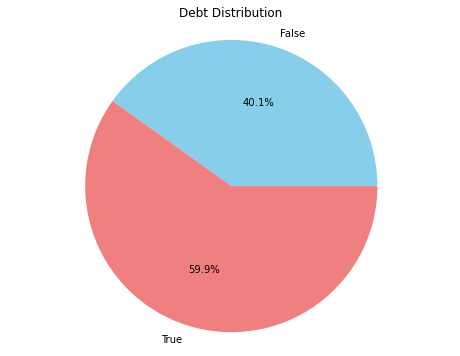

In [26]:
Debt_counts = df['Debt'].value_counts()

Debt_counts = Debt_counts.to_pandas()

plt.figure(figsize=(8, 6))
plt.pie(Debt_counts['count'], labels=Debt_counts['Debt'].astype(str), autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Debt Distribution')
plt.axis('equal')
plt.show()


In [27]:
Debt_counts = df['Debt'].value_counts()

Debt_counts = Debt_counts.to_pandas()

trace = go.Pie(labels=Debt_counts['Debt'].astype(str), 
               values=Debt_counts['count'],
               hoverinfo='label+percent+value',  
               textinfo='percent', 
               marker=dict(colors=['skyblue', 'lightcoral'], 
                           line=dict(color='#000000', width=2)))

layout = go.Layout(title='Debt Distribution', 
                   showlegend=True)

fig = go.Figure(data=[trace], layout=layout)
fig.show()

#### Owns Property Ration

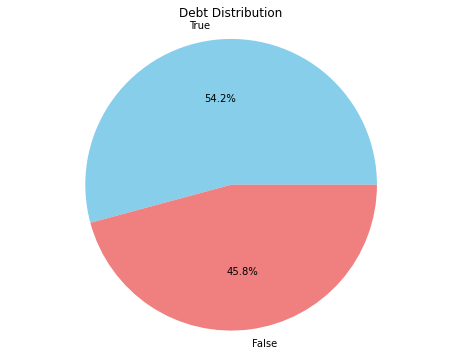

In [28]:
Property_counts = df['Owns Property'].value_counts()

Property_counts = Property_counts.to_pandas()

plt.figure(figsize=(8, 6))
plt.pie(Property_counts['count'], labels=Property_counts['Owns Property'].astype(str), autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Debt Distribution')
plt.axis('equal')
plt.show()

In [29]:
Property_counts = df['Owns Property'].value_counts()

Property_counts = Property_counts.to_pandas()

trace = go.Pie(labels=Property_counts['Owns Property'].astype(str), 
               values=Property_counts['count'],
               hoverinfo='label+percent+value',  
               textinfo='percent', 
               marker=dict(colors=['skyblue', 'lightcoral'], 
                           line=dict(color='#000000', width=2)))

layout = go.Layout(title='Owns Property Distribution', 
                   showlegend=True)

fig = go.Figure(data=[trace], layout=layout)
fig.show()